In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import os

In [75]:
# Uncomment on kaggle to know data path
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [76]:
base_path=''

In [77]:
df_train = pd.read_csv(base_path + 'train.csv')
df_test = pd.read_csv(base_path + 'test.csv')

# EDA

In [78]:
print("Original Shape of Train and Test before starting EDA")
print(df_train.shape)
print(df_test.shape)

Original Shape of Train and Test before starting EDA
(1460, 81)
(1459, 80)


In [79]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [81]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [82]:
#dropping features with very less values
df_train.drop(['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley'], axis=1, inplace=True)
df_test.drop(['PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'Alley'], axis=1, inplace=True)

In [83]:
test_Id = df_test.Id
train_Id = df_train.Id
df_train.drop(['Id'], axis=1, inplace=True)
df_test.drop(['Id'], axis=1, inplace=True)

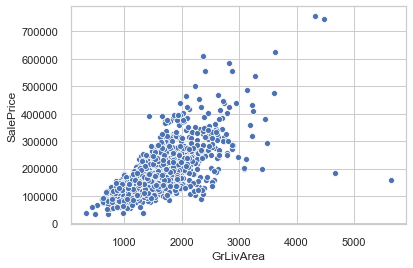

In [84]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)

In [85]:
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<600000)].index)

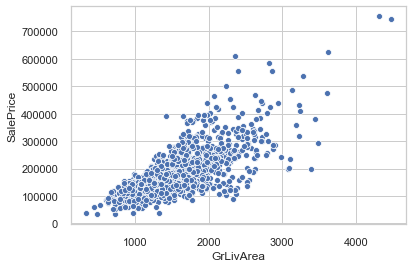

In [86]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)

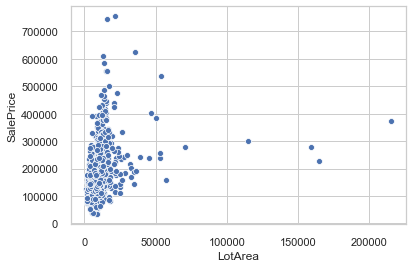

In [87]:
sns.scatterplot(x='LotArea', y='SalePrice', data=df_train)

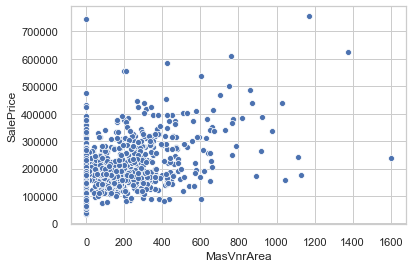

In [88]:
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=df_train)


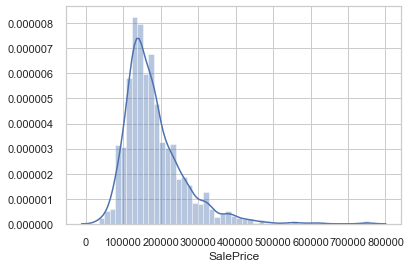

In [89]:
sns.distplot(df_train.SalePrice)

In [90]:
df_train.SalePrice.describe()

count      1458.000000
mean     180932.919067
std       79495.055285
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Distribution plot and descriptive stats shows there are outliers in our target variable

# Correlation Matrix

(<Figure size 1440x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2c1eb8d0>)

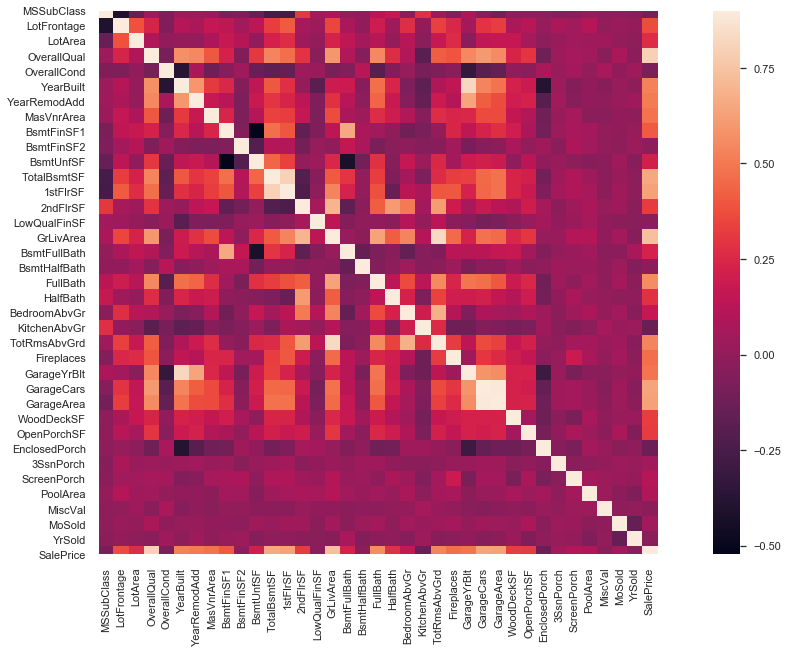

In [91]:
corrmat = df_train.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, vmax=0.9, square=True)

# outlier treatment

In [92]:
# df_train["SalePrice"] = np.log1p(df_train["SalePrice"])

In [93]:
df_train.SalePrice.sort_values(ascending=False)

691     755000
1182    745000
1169    625000
898     611657
803     582933
         ...  
30       40000
533      39300
968      37900
916      35311
495      34900
Name: SalePrice, Length: 1458, dtype: int64

In [94]:
len(df_train)*(0.05)

72.9

In [95]:
df_train = df_train.sort_values('SalePrice',ascending=False).iloc[73:]

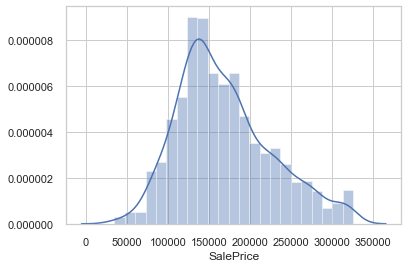

In [96]:
sns.distplot(df_train.SalePrice)

In [97]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [98]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.786573
GrLivArea        0.683835
GarageCars       0.625767
GarageArea       0.608110
TotalBsmtSF      0.583675
FullBath         0.576976
YearBuilt        0.565187
1stFlrSF         0.551265
YearRemodAdd     0.541982
GarageYrBlt      0.508482
TotRmsAbvGrd     0.472858
Fireplaces       0.454382
MasVnrArea       0.347397
LotFrontage      0.331858
OpenPorchSF      0.326245
2ndFlrSF         0.303565
WoodDeckSF       0.301412
BsmtFinSF1       0.295936
HalfBath         0.275597
LotArea          0.254336
BsmtUnfSF        0.234202
BedroomAbvGr     0.197250
BsmtFullBath     0.190726
ScreenPorch      0.112919
MoSold           0.078632
PoolArea         0.056668
3SsnPorch        0.047706
BsmtFinSF2       0.014741
MiscVal         -0.011082
BsmtHalfBath    -0.013396
OverallCond     -0.042145
YrSold          -0.045151
LowQualFinSF    -0.057135
MSSubClass      -0.062696
EnclosedPorch   -0.146851
KitchenAbvGr    -0.147233
Name: SalePrice, dtype: float64

In [99]:
train_index = df_train.shape[0]
test_index = df_test.shape[0]
train_SalePrice = df_train.SalePrice
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2844, 74)


In [100]:
train_index

1385

In [101]:
all_data.head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,BsmtFinType2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,CentralAir,Condition1,Condition2,Electrical,EnclosedPorch,ExterCond,ExterQual,Exterior1st,Exterior2nd,Fireplaces,Foundation,FullBath,Functional,GarageArea,GarageCars,GarageCond,GarageFinish,GarageQual,GarageType,GarageYrBlt,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotFrontage,LotShape,LowQualFinSF,MSSubClass,MSZoning,MasVnrArea,MasVnrType,MiscVal,MoSold,Neighborhood,OpenPorchSF,OverallCond,OverallQual,PavedDrive,PoolArea,RoofMatl,RoofStyle,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,1850,0,0,3,1Fam,TA,Gd,1261.0,0.0,GLQ,Unf,1.0,0.0,Ex,572.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,2,Typ,772.0,3.0,TA,Fin,TA,Attchd,2004.0,1850,0,GasA,Ex,1Story,1,Gd,Lvl,Gtl,16033,FR2,98.0,IR1,0,20,RL,378.0,BrkFace,0,3,NridgHt,112,5,9,Y,0,CompShg,Hip,Normal,WD,0,Pave,8,1833.0,AllPub,519,2004,2005,2006
1,1610,551,0,3,1Fam,TA,No,1288.0,0.0,GLQ,Unf,1.0,0.0,Ex,294.0,Y,Norm,Norm,SBrkr,0,TA,Gd,VinylSd,VinylSd,1,PConc,1,Typ,789.0,3.0,TA,Fin,TA,Attchd,2007.0,2161,1,GasA,Ex,2Story,1,Ex,Lvl,Gtl,10562,Inside,86.0,Reg,0,60,RL,300.0,Stone,0,11,NridgHt,120,5,8,Y,0,CompShg,Gable,Partial,New,0,Pave,8,1582.0,AllPub,178,2007,2007,2007


In [102]:
train_SalePrice

480     326000
167     325624
20      325300
583     325000
1105    325000
         ...  
30       40000
533      39300
968      37900
916      35311
495      34900
Name: SalePrice, Length: 1385, dtype: int64

# Missing Values

In [103]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
LotFrontage,16.947961
GarageYrBlt,5.590717
GarageQual,5.590717
GarageFinish,5.590717
GarageCond,5.590717
GarageType,5.520394
BsmtCond,2.883263
BsmtExposure,2.883263
BsmtQual,2.848101
BsmtFinType2,2.812940


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Percent of missing values')

Text(0.5, 1.0, 'Percent missing data by feature')

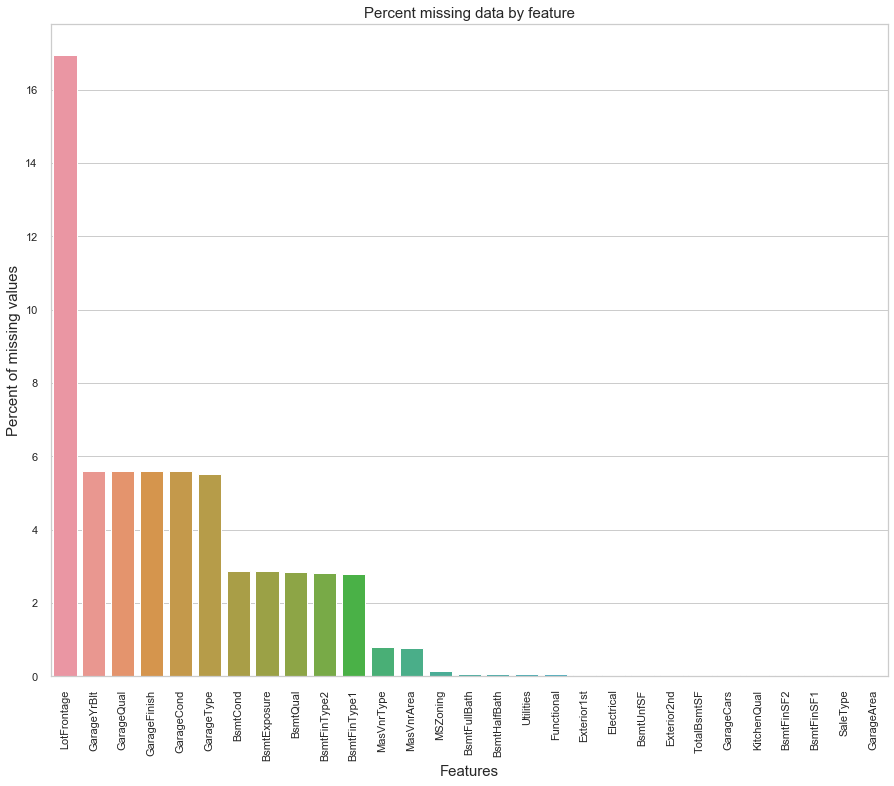

In [104]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [105]:
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x


In [106]:
all_data = all_data.apply(missing_imputation)

In [107]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2844, 269)


In [108]:
df_train = all_data[:train_index]
df_test = all_data[train_index:]

In [109]:
df_train.head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleConditi

In [110]:
df_test.head(2)

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,CentralAir_N,CentralAir_Y,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleConditi

In [111]:
print(df_train.shape)
print(df_test.shape)

(1385, 269)
(1459, 269)


# Feature Selection

In [112]:
df_train_conti_vars = df_train.loc[:, (df_train.dtypes == 'float64') | (df_train.dtypes == 'int64')]

In [113]:
df_test_conti_vars = df_test.loc[:, (df_test.dtypes == 'float64') | (df_test.dtypes == 'int64')]

In [114]:
# df_train_conti_vars = df_train[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]
# df_test_conti_vars = df_test[['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']]



In [115]:
df_train_conti_vars.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [116]:
df_test_conti_vars.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [117]:
from sklearn.preprocessing import StandardScaler
train_data = StandardScaler().fit_transform(df_train_conti_vars)
test_data = StandardScaler().fit_transform(df_test_conti_vars)

In [118]:
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [119]:
train_data.columns= df_train_conti_vars.columns

In [120]:
test_data.columns= df_test_conti_vars.columns

In [121]:
train_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,2.130163,-0.793900,-0.113757,0.175333,2.134859,-0.293614,1.160893,-0.244601,0.028703,-0.365115,0.673833,0.870256,1.572754,1.798347,1.120267,0.851508,-0.734187,-0.217367,0.729461,1.439559,-0.120984,-0.872623,1.887542,-0.090049,-1.229534,1.052926,-0.531137,2.413710,-0.059591,-0.267321,1.048376,2.156825,3.563154,1.140572,1.021819,-1.366327
1,1.424197,0.528089,-0.113757,0.175333,2.202454,-0.293614,1.160893,-0.244601,-0.619102,-0.365115,0.673833,-0.998433,1.657237,1.798347,1.245904,1.534864,1.267484,-0.217367,0.060604,0.851477,-0.120984,0.058758,1.380658,-0.090049,1.733973,1.176896,-0.531137,1.620028,-0.059591,-0.267321,1.048376,1.494282,0.738974,1.240608,1.118570,-0.612698
2,0.094628,2.128392,-0.113757,1.414296,-1.022090,-0.293614,-0.790365,-0.244601,1.394220,-0.365115,0.673833,2.738945,1.975291,1.798347,1.162146,2.007280,1.267484,-0.217367,0.507201,1.586579,-0.120984,0.058758,1.900539,-0.090049,1.733973,1.703767,-0.531137,1.620028,-0.059591,-0.267321,1.702431,0.375086,1.252462,1.173917,1.070195,-1.366327
3,1.162402,2.214765,-0.113757,0.175333,-1.022090,-0.293614,-0.790365,-0.244601,1.578309,-0.365115,0.673833,2.738945,2.109470,0.405332,0.450200,2.883998,1.267484,-0.217367,0.419789,0.312403,-0.120984,0.408025,-0.568899,-0.090049,0.252219,7.096452,3.039859,3.207391,-0.059591,-0.267321,1.702431,0.583616,0.134385,-2.560738,0.779943,0.140931
4,1.100629,1.898063,-0.113757,0.175333,1.561551,-0.293614,1.160893,-0.244601,-0.299860,-0.365115,2.266425,0.870256,1.274579,0.405332,0.701475,2.547813,1.267484,-0.217367,0.267704,1.439559,-0.120984,0.058758,1.783566,-0.090049,-0.859096,-0.186771,-0.531137,1.620028,-0.059591,-0.267321,1.702431,1.180168,0.805231,0.807121,0.538066,1.648189


In [122]:
test_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,-0.654561,-0.775254,-0.088827,-1.029543,0.063317,0.517357,-0.81953,-0.25851,-0.650623,-0.360738,-0.898055,-1.028720,1.185971,-0.987988,-0.649996,-1.215588,-0.751040,-0.20391,0.363929,0.555407,-0.080483,-0.874711,-0.569729,-0.092244,-0.038281,-0.701628,0.400766,-0.751101,-0.057227,1.818960,-0.918335,-0.370786,0.366678,-0.340945,-1.072885,1.713905
1,0.433298,-0.775254,-0.088827,0.175997,1.063414,-0.297894,-0.81953,-0.25851,-0.339382,-0.360738,-0.898055,-1.028720,-0.741186,-0.987988,-0.766702,-0.323539,1.237648,-0.20391,0.897861,0.604059,-0.080483,-0.874711,0.041648,19.730438,-0.038281,-0.178826,0.400766,-0.054877,-0.057227,-0.301543,-0.255371,0.639167,2.347867,-0.439695,-1.214908,1.713905
2,-0.574165,0.891944,-0.088827,0.175997,0.773276,-0.297894,-0.81953,-0.25851,-0.954998,-0.360738,0.647066,0.773083,0.042586,0.301647,0.750472,0.294508,1.237648,-0.20391,0.809646,0.263496,-0.080483,0.061351,-0.569729,-0.092244,-1.140614,-0.207871,-0.497418,-0.751101,-0.057227,-0.301543,-0.255371,-0.266853,0.930495,0.844059,0.678742,1.713905
3,-0.579190,0.837243,-0.088827,0.175997,0.357851,-0.297894,-0.81953,-0.25851,-0.527042,-0.360738,0.647066,0.773083,-0.012739,0.301647,0.789374,0.243004,1.237648,-0.20391,0.032064,0.458103,-0.080483,0.061351,-0.456511,-0.092244,-0.038281,-0.178826,0.400766,-0.054877,-0.057227,-0.301543,0.407593,-0.271372,2.089451,0.876976,0.678742,1.713905
4,0.310192,-0.775254,-0.088827,-1.029543,-0.387276,-0.297894,-0.81953,-0.25851,1.058913,-0.360738,-0.898055,0.773083,0.153236,0.301647,0.555962,-0.424487,-0.751040,-0.20391,-0.971808,-1.244713,-0.080483,1.465443,-0.569729,-0.092244,-1.875504,0.489198,-0.497418,1.337571,-0.057227,2.243060,-0.918335,0.528456,-0.729632,0.679475,0.394694,1.713905


In [123]:
print(train_data.shape)
print(test_data.shape)

(1385, 36)
(1459, 36)


# Modeling

In [124]:
X = train_data
y = train_SalePrice

In [125]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=42)

In [126]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (1108, 36)
y_train shape:  (1108,)

Test cases as below
X_test shape:  (277, 36)
y_test shape:  (277,)


In [127]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(copy_X=True, fit_intercept=True,n_jobs=None, normalize=False)
linreg.fit(X_train, y_train)
y_pred_test = linreg.predict(X_test)   

                                                # make predictions on the testing set
RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
print('RMSE for the test set is {}'.format(RMSE_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

RMSE for the test set is 386249819.98069733


In [128]:
y_test.iloc[1]

226000

In [129]:
y_pred_test[1]

231791.8408102725

In [130]:
y_test.shape

(277,)

In [131]:
y_pred_test.shape

(277,)

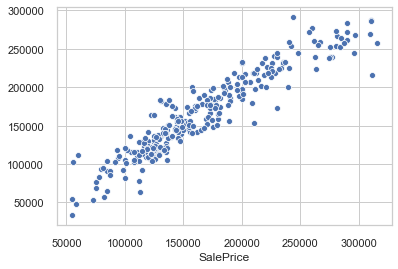

In [132]:
sns.scatterplot(x=y_test, y=y_pred_test)

In [133]:
print('Intercept:',linreg.intercept_)                                           # print the intercept 
print('Coefficients:',linreg.coef_)

Intercept: 168673.0831568753
Coefficients: [ 6720.7151307   9305.11754507  -612.38265047 -4757.74605339
  5143.53001016   472.21644078  2060.66669304 -1238.5591248
   365.86086156   555.85552127  2498.30522312   871.3073696
  2450.0810922   2450.18046378  2392.88580651 13469.19290199
 -1145.61017091 -3118.99856689  3768.07361684  2027.55260286
  -698.5163911  -3906.69188059  1663.05557298  -360.28480084
   254.9561399   1672.9054005   5960.61722591 15295.77921547
   330.70396375  1700.92207741  1470.19096613  6041.15175916
  2002.04880275 10240.8101111   3692.84135496 -1143.99799989]


In [134]:
feature_cols=df_train_conti_vars.columns

In [135]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()
coef.insert(0, linreg.intercept_)

Index(['Intercept', '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [136]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

1stFlrSF 168673.0831568753
2ndFlrSF 6720.715130698204
3SsnPorch 9305.1175450691
BedroomAbvGr -612.3826504744933
BsmtFinSF1 -4757.746053385086
BsmtFinSF2 5143.530010163502
BsmtFullBath 472.21644077971234
BsmtHalfBath 2060.6666930363945
BsmtUnfSF -1238.55912480046
EnclosedPorch 365.86086155908265
Fireplaces 555.8555212685174
FullBath 2498.3052231200368
GarageArea 871.3073696034181
GarageCars 2450.0810921974053
GarageYrBlt 2450.1804637824434
GrLivArea 2392.885806510152
HalfBath 13469.192901986069
KitchenAbvGr -1145.6101709145998
LotArea -3118.9985668910244
LotFrontage 3768.0736168431317
LowQualFinSF 2027.5526028590948
MSSubClass -698.5163910960403
MasVnrArea -3906.691880591658
MiscVal 1663.055572977236
MoSold -360.2848008425547
OpenPorchSF 254.95613990136604
OverallCond 1672.9054005037224
OverallQual 5960.617225913952
PoolArea 15295.779215474811
ScreenPorch 330.7039637454114
TotRmsAbvGrd 1700.922077413382
TotalBsmtSF 1470.1909661312377
WoodDeckSF 6041.151759155957
YearBuilt 2002.048802754

# submissions

In [137]:
test_data.shape

(1459, 36)

In [138]:
test_SalePrice = linreg.predict(test_data) 

In [139]:
sub = pd.DataFrame()
sub['Id'] = test_Id
sub['SalePrice'] = test_SalePrice
sub.to_csv('submission.csv',index=False)

In [140]:
sub.head()

,Id,SalePrice
0,1461,127266.708188
1,1462,151860.332497
2,1463,178291.802887
3,1464,192622.975751
4,1465,177535.090169
